## LATAR BELAKANG

Perusahaan pengelola AirBnb mengumpulkan para investor properti untuk membangun dan bergabung menyewakan properti di AirBnb khususnya daerah Bangkok, Thailand. Thailand khususnya Bangkok memiliki potensi yang besar dibidang pariwisata. Banyaknya wisatawan yang datang membutuhkan akomodasi dan fasilitas yang memadai untuk berlibur. Tidak hanya wisatawan, banyak juga pekerja asing yang bekerja di pusat perkantoran di daerah Bangkok yang membutuhkan tempat yang nyaman untuk tinggal. Maka dari itu dibutuhkan investasi tambahan properti yang bisa menjadi pilihan untuk para wisatawan lokal maupun mancanegara.  

## PERNYATAAN MASALAH

Perusahaan ingin para investor mengetahui daerah mana saja yang strategis untuk membangun properti melalui ulasan yang diterima oleh beberapa pengelola properti. 
Perusahaan AirBnb juga ingin para investor melihat pasaran harga dari properti yang disewakan berdasarkan daerah. Informasi ini dapat menjadi pertimbangan investor untuk dapat memilih tipe properti apa yang akan disewakan dan di daerah mana yang memiliki kemungkinan profit yang tinggi serta pasaran harga yang disewakan dari properti tersebut.

## DATA

Untuk menjawab pertanyaan di atas, kita akan menganalisa data peserta yang sudah dikumpulkan oleh perusahaan.

In [46]:
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import spearmanr


Dataset ini berisi informasi terkait letak properti AirBnb yang disewakan, serta jumlah ulasan yang diisi di aplikasi AirBnb berdasarkan periode waktu.
Dataset ini memiliki 17 kolom sebagai berikut :
* Unnamed: 0 = urutan no data dari nomor 1 samapai akhir data
* id = nomor unik yang menggambarkan nama properti
* name = nama properti
* host_id = nomor unik yang menggambarkan nama pengelola/pemilik properti
* host_name = nama pemilik/pengelola properti, biasanya hanya nama pertama
* neighbourhood = nama distrik berdasarkan garis lintang dan garis bujur
* latitude = menggunakan World Geodetic System (WGS84) untuk garis lintang dan garis bujur
* longitude = menggunakan World Geodetic System (WGS84) untuk garis lintang dan garis bujur
* room_type = tipe ruangan yang disewakan
* price = harga sewa per malam dalam mata uang lokal
* minimun_nights = jumlah minimum masa inap 
* number_of_reviews = jumlah ulasan yang dimiliki 
* last_review = tanggal ulasan terakhir/terbaru  
* reviews_per_month = rata-rata jumlah ulasan yang diterima per bulan
* calculated_host_listings_count = jumlah properti yang dimiliki pengelola/pemilik  
* availability_365 = jumlah malam yang kosong dan bisa disewa kedepannya
* number_of_reviews_ltm = jumlah review dalam 12 bulan terakhir

Berikut 5 baris teratas dan terbawah dari dataset

In [2]:
df = pd.read_csv('Airbnb Listings Bangkok.csv')
display(df.head(),df.tail())

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934.0,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,1/6/2020,0.50,2,353,0
1,1,27979.0,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745.0,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780.0,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,4/1/2022,0.03,1,323,1
4,4,941865.0,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15849,15849,7.904650e+17,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,7.904750e+17,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,7.904750e+17,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,7.904760e+17,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0
15853,15853,7.904760e+17,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.752960,100.540820,Private room,1214,1,0,NaN,NaN,14,365,0


## Data Understanding and Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, kita lihat terlebih dahulu informasi umum dari dataset Airbnb Listings Bangkok.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  float64
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

In [4]:
display(df.describe(), df.describe(include='object'))

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,15854.000000,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,7926.500000,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,4576.799919,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,0.000000,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3963.250000,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,7926.500000,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,11889.750000,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,15853.000000,7.908160e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


,name,host_name,neighbourhood,room_type,last_review
count,15846,15853,15854,15854,10064
unique,14794,5312,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,12/11/2022
freq,45,228,2153,8912,189


In [5]:
df['price'].sort_values()

11103          0
15551        278
15401        280
15456        280
15455        280
          ...   
4620     1000000
9345     1000000
1779     1000000
12300    1014758
12868    1100000
Name: price, Length: 15854, dtype: int64

Secara umum, kita bisa melihat bahwa :
* Dataset Airbnb Listing Bangkok memiliki 17 kolom dan 15854 baris
* Dataset Airbnb Listing Bangkok memiliki kolom 'name', 'host_name', 'last_review', dan 'reviews_per_month' yang memiliki data kosong yang diisi dengan NaN.
* Kolom 'Unnamed : 0' berisi urutan index dari 0 - data terakhir, tidak relevan dan tidak digunakan pada saat analisis dan bisa dihapus saja
* Salah satu data pada kolom data price memiliki nilai 0, sedangkan pengelola tidak mungkin menyewakan penginapan secara gratis atau seharga 0, maka data ini akan dihapus

## Missing Values

In [6]:
df.isnull().sum()

Unnamed: 0                           0
id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [7]:
# cek presentase missing value dari columns
missValue = df.isnull().sum()
total_count = df.shape[0]
missPercentage = (missValue/total_count)*100
missPercentage

Unnamed: 0                         0.000000
id                                 0.000000
name                               0.050460
host_id                            0.000000
host_name                          0.006308
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       36.520752
reviews_per_month                 36.520752
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
dtype: float64

<Axes: >

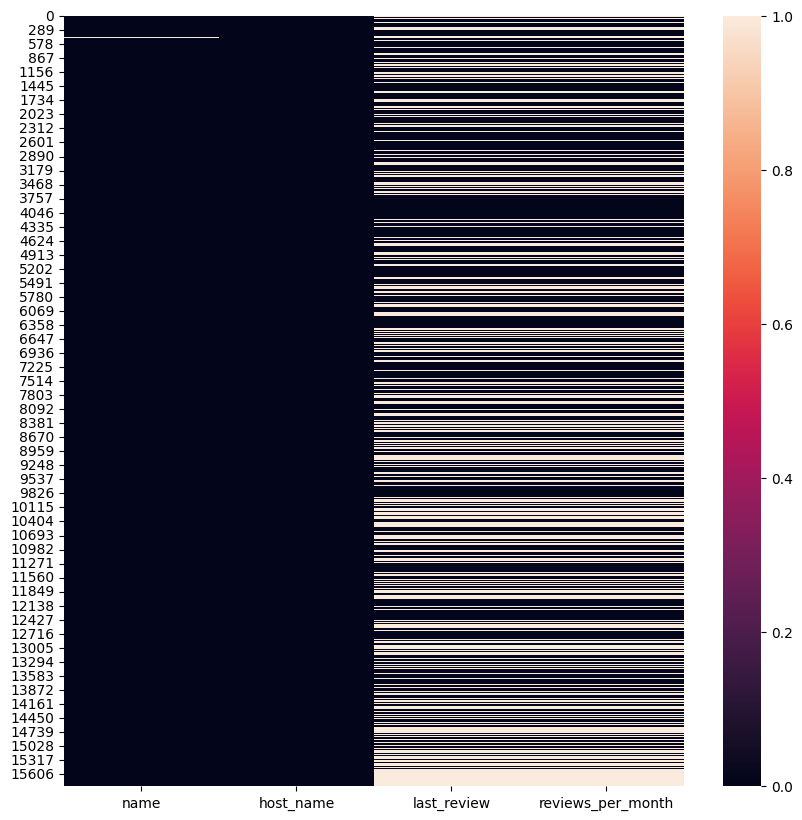

In [8]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df[['name', 'host_name', 'last_review', 'reviews_per_month']].isna())

Secara garis besar dapat disimpulkan :
* Persebaran missing value pada kolom `last_review` dan `reviews_per_month` berkaitan, jika data `last_review` kosong maka `reviews_per_month` pun juga kosong. Jumlah missing value di dua kolom tersebut sama dengan jumlah 5790 baris atau 36.52%. Kolom yang tersebut tidak bisa dihapus karena data kosong hanya memiliki nilai < 50% dan data pada kolom tersebut penting untuk analisa kedepannya, sedangkan menghapus baris pun tidak bisa karena missing value nya tinggi yaitu diatas 10%
* Pada kolom `name` hanya ada satu data yang kosong. Dikarenakan hanya satu, baris pada kolom `name` yang kosong maka bisa dihapus karena tidak terlalu berpengaruh
* Kolom `host_name` memiliki 8 data kosong dengan presentase 0.006%. Baris dengan kolom `host_name` yang kosong akan dihapus karena tidak berpengaruh signifikan terhadap analisa kedepannya
* Pada kolom `reviews_per_month` data yang berisi NaN akan diubah dengan angka 0, karena memang pada saat periode tersebut tidak ada ulasan yang masuk, ditandai dengan nilai pada kolom `last_review` yang kosong juga
* Missing value pada kolom `last_review` tetap akan dibiarkan kosong dengan mengubah data NaN menjadi NaT karena kolom last review akan diubah menjadi type datetime. Jika data masih berisi NaN maka data pada kolom tersebut tidak bisa diubah ke type datetime. Pilihan untuk mengubah data dengan data setelah atau sebelumnya juga tidak bisa dilakukan, karena data tidak berurutan berdasarkan waktu. Seperti pada kolom `reviews_per_month`, data pada kolom `last_review` tidak dapat diganti dengan nilai mean, median, atau modus dari data lainnya

In [9]:
df[df['last_review'].isna()]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,1,2.797900e+04,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,2.874500e+04,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
4,4,9.418650e+05,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
7,7,1.738669e+06,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,NaN,NaN,1,365,0
14,14,9.592540e+05,"Deluxe Condo, Nana, Pool/GYM/Sauna",5153476,Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,NaN,NaN,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,15849,7.904650e+17,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,7.904750e+17,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,7.904750e+17,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,7.904760e+17,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


Kita sudah melihat gambaran kasar anomali di dalam data kita, sekarang, mari kita lihat dan tangani tiap-tiap anomali secara lebih jauh.  


In [10]:
df.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934.0,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,1/6/2020,0.50,2,353,0
1,1,27979.0,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745.0,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780.0,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,4/1/2022,0.03,1,323,1
4,4,941865.0,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


In [11]:
# Menghapus kolom 'Unnamed : 0'
df = df.drop(columns='Unnamed: 0')

In [12]:
# Menghapus nilai 0 pada kolom 'price'
df = df.loc[df['price']!=0]

In [13]:
# Menghapus baris yang memiliki data kosong pada kolom 'name'
df = df.dropna(subset=['name'])

In [14]:
# Menghapus baris yang memiliki data kosong pada kolom 'host_name'
df = df.dropna(subset=['host_name'])

In [15]:
# Mengisi data kosong pada kolom 'reviews_per_month' dengan nilai 0
df['reviews_per_month'].fillna(0, inplace=True)

In [16]:
# Mengubah data NaN pada kolom 'last_review' dengan NaT 
df['last_review'].fillna(pd.NaT, inplace=True)

## `id` dan `host_id`
data pada kolom `id` dan `host_id` akan dihapusa karena hanya berisi id unik dari properti yang disewakan dan pengelola/pemilik dari properti tersebut

In [17]:
df = df.drop(columns=['id', 'host_id'])

In [18]:
# Mengubah type data kolom 'last_review' menjadi type datetime
df['last_review'] = pd.to_datetime(df['last_review']) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15844 entries, 0 to 15853
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   name                            15844 non-null  object        
 1   host_name                       15844 non-null  object        
 2   neighbourhood                   15844 non-null  object        
 3   latitude                        15844 non-null  float64       
 4   longitude                       15844 non-null  float64       
 5   room_type                       15844 non-null  object        
 6   price                           15844 non-null  int64         
 7   minimum_nights                  15844 non-null  int64         
 8   number_of_reviews               15844 non-null  int64         
 9   last_review                     10061 non-null  datetime64[ns]
 10  reviews_per_month               15844 non-null  float64       
 11  calcula

Setelah mengubah type data kolom `last_review` menjadi datetime64[ns], kita akan memisahkan bulan dan tahun nya dan memasukkannya ke kolom baru agar mempermudah analisa kedepannya

In [19]:
# Mengekstrak data bulan dari kolom last_review
last_review_dt = df['last_review'].dt
last_review_dt.month_name()
df['month'] = last_review_dt.month_name()

In [20]:
# Mengekstrak data tahun dari kolom last_review
df['year'] = last_review_dt.year

In [21]:
df.columns

Index(['name', 'host_name', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'month', 'year'],
      dtype='object')

## Data yang sudah bersih
Kita sudah selesai membersihkan data, sekarang kita cek kembali data yang suda bersih

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15844 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   name                            15844 non-null  object        
 1   host_name                       15844 non-null  object        
 2   neighbourhood                   15844 non-null  object        
 3   latitude                        15844 non-null  float64       
 4   longitude                       15844 non-null  float64       
 5   room_type                       15844 non-null  object        
 6   price                           15844 non-null  int64         
 7   minimum_nights                  15844 non-null  int64         
 8   number_of_reviews               15844 non-null  int64         
 9   last_review                     10061 non-null  datetime64[ns]
 10  reviews_per_month               15844 non-null  float64       
 11  calcula

Sekarang data yang ada berisi 16 kolom dan 15844 baris, dari sebelumnya 17 kolom dan 15854 baris. Kita hanya menghapus 10 baris dan 3 kolom serta menambahkan 2 kolom yang dirasa dibutuhkan untuk analisa kedepannya. Kita juga mengganti data yang kosong sesuai dengan kebutuhan yang sudah dijelaskan sebelumnya.

## DATA ANALYSIS

Setelah melakukan Data Cleaning, kita bisa melakukan analisis data untuk melihat karakteristik yang baik untuk membuat properti penyewaan yang dibutuhkan dan diminati wisatawan.

Analisis dilakukan dengan membandingkan data dari tahun 2019-2022 yang memunjukkan wilayah dan type ruangan mana yang diminati penyewa dengan melihat nilai tertinggi dari data.

In [23]:
df.columns

Index(['name', 'host_name', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'month', 'year'],
      dtype='object')

* Tren penyewaan dari tahun 2012-2022 berdasarkan jumlah properti yang disewakan

In [24]:
year = df[df['year'].isin([2020,2021,2022])]
pd.crosstab(df['year'], columns='Jumlah Penyewaan', values=df['number_of_reviews'], aggfunc='count')

col_0,Jumlah Penyewaan
year,
2012.0,1
2013.0,7
2014.0,9
2015.0,50
2016.0,149
2017.0,266
2018.0,484
2019.0,1012
2020.0,1248


In [25]:
result = df[['year', 'number_of_reviews']].groupby('year').count()

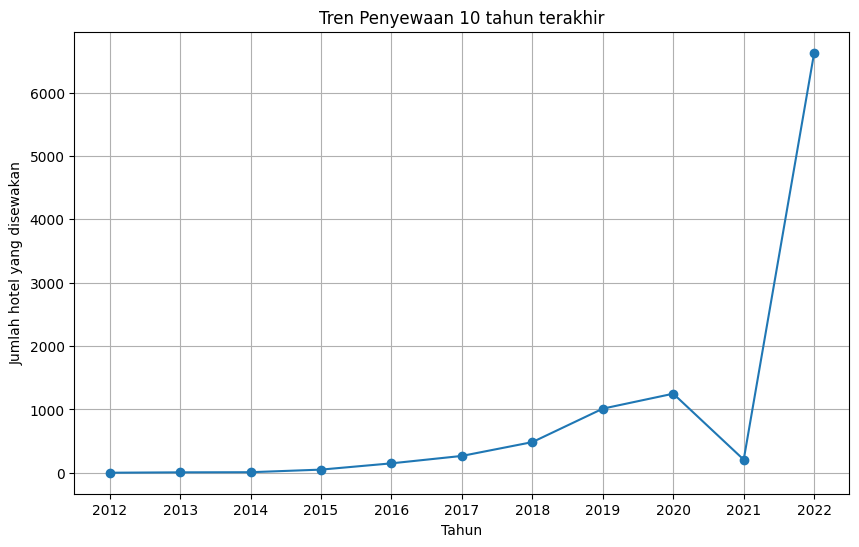

In [26]:
plt.figure(figsize=(10,6))
plt.plot(result.index, result['number_of_reviews'], marker='o', linestyle='-')
plt.title('Tren Penyewaan 10 tahun terakhir')
plt.xlabel('Tahun')
plt.ylabel('Jumlah hotel yang disewakan')
plt.grid(True)
plt.xticks(result.index)
plt.show()


* Tren penyewaan Airbnb di Bangkok cenderung naik dari tahun 2012 hingga tahun 2024
* Penurunan Tren penyewaan pada tahun 2021 terjadi karena lonjakan kasus covid-19 khususnya di Bangkok 
* Untuk meningkatkan kembali pariwisata Bangkok, pemerintah membuat kebijakan untuk menghapus karantina bagi turis dari 46 negara yang dimulai pada November 2021 sehingga berdampak pada tahun selanjutnya

source :
https://travel.detik.com/travel-news/d-5665675/kasus-covid-19-melonjak-thailand-bangun-rs-darurat-di-bandara-don-muang
https://travel.detik.com/detiktravel-non-api/d-5777915/thailand-bebaskan-karantina-turis-dari-46-negara


In [27]:
result = df[['year', 'number_of_reviews']].groupby('year').sum()

* Mengetahui 10 daerah/distrik yang memiliki properti yang paling banyak disewa

In [28]:
district = pd.crosstab(df['neighbourhood'], columns='Jumlah').sort_values(by='Jumlah', ascending=False).head(10)

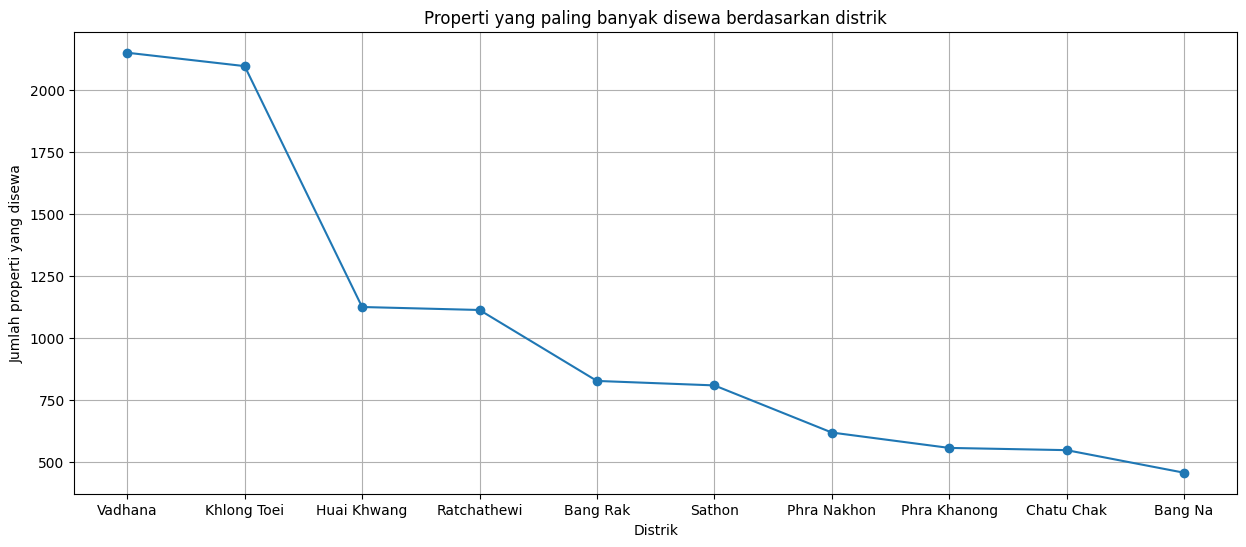

In [29]:
plt.figure(figsize=(15,6))
plt.plot(district.index, district['Jumlah'], marker='o', linestyle='-')
plt.title('Properti yang paling banyak disewa berdasarkan distrik')
plt.xlabel('Distrik')
plt.ylabel('Jumlah properti yang disewa')
plt.grid(True)
plt.xticks(district.index)
plt.show()

* 10 distrik yang paling banyak disewa berdasarkan jumlah review dari penyewa

In [30]:
district = pd.crosstab(df['neighbourhood'], columns='number_of_reviews').sort_values(by='number_of_reviews', ascending=False).head(10)

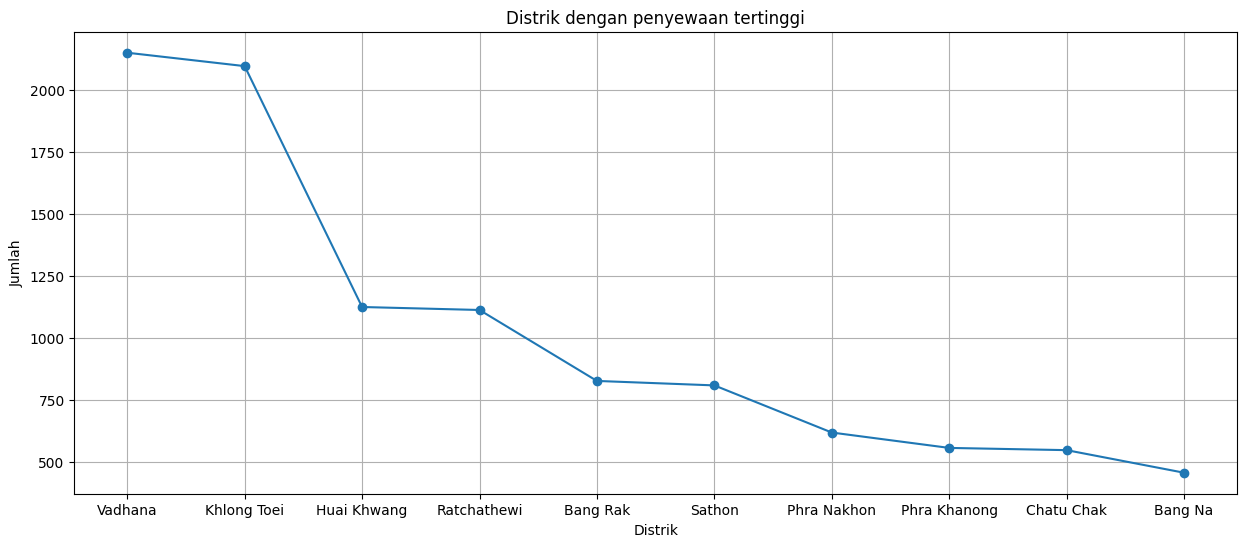

In [31]:
plt.figure(figsize=(15,6))
plt.plot(district.index, district['number_of_reviews'], marker='o', linestyle='-')
plt.title('Distrik dengan penyewaan tertinggi')
plt.xlabel('Distrik')
plt.ylabel('Jumlah')
plt.grid(True)
plt.xticks(district.index)
plt.show()

* Vadhana merupakan distrik yang memiliki properti penyewaan dan jumlah penyewaan terbanyak, hal itu terjadi karena Vadhana memiliki properti dengan fasilitas yang bagus dan memiliki pilihan transportasi yang nyaman
* Pemilik dan penyewa properti di distrik Vadhana merupakan warga asing dan domestik, bukan hanya wisatawan tetapi penyewa merupakan pekerja yang mencari tempat tinggal terdekat dari tempat ia bekerja.

source :
https://www.bangkokpost.com/business/general/2719059/watthana-top-among-condo-buyers


* type ruangan yang paling banyak disewa 

In [32]:
room_type = pd.crosstab(df['room_type'], columns='number_of_reviews').sort_values(by='number_of_reviews', ascending=False)
room_type

col_0,number_of_reviews
room_type,
Entire home/apt,8911
Private room,5762
Hotel room,648
Shared room,523


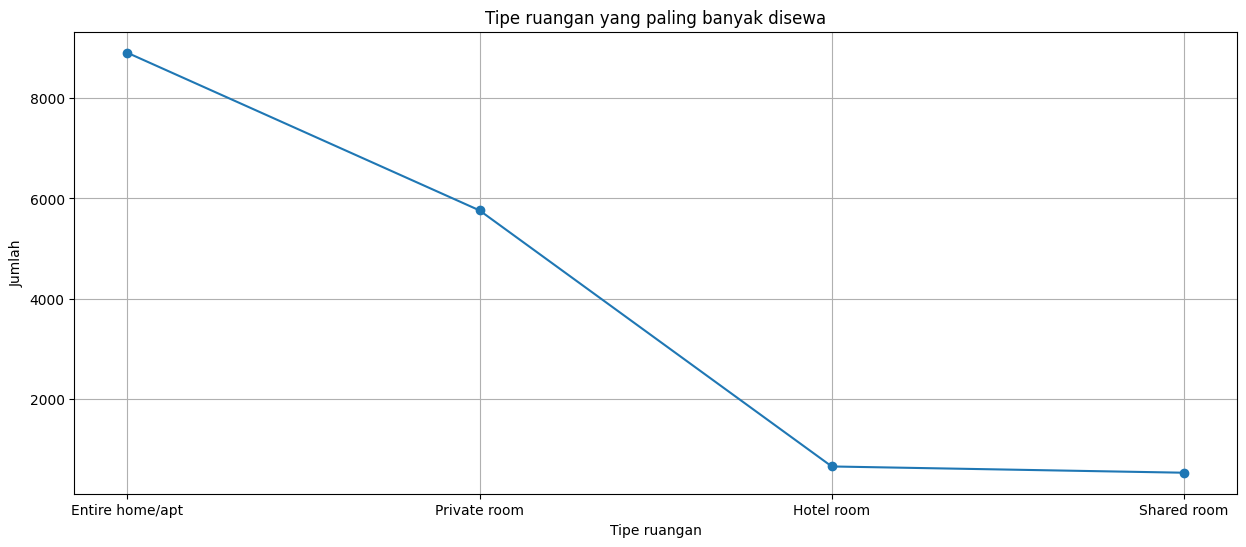

In [33]:
plt.figure(figsize=(15,6))
plt.plot(room_type.index, room_type['number_of_reviews'], marker='o', linestyle='-')
plt.title('Tipe ruangan yang paling banyak disewa')
plt.xlabel('Tipe ruangan')
plt.ylabel('Jumlah')
plt.grid(True)
plt.show()

* Entire home/apartment merupakan type ruangan yang paling banyak disewa, karena rata-rata penyewa bukan hanya dari kalangan turis, tetapi juga pekerja dari luar negeri
* Pekerja tersebut membutuhkan tempat tinggal yang mempunyai jangka waktu yang panjang dengan harga yang lebih rendah, apartemen atau kondominium merupakan pilihan yang cocok
* Apartemen bisa disewakan dari jangka waktu perbulan sampai maksimal 30 tahun

source :
https://www.remax.co.th/Why-Expats-Rent-Condo-Apartment-Bangkok.aspx


* Melihat jumlah penyewaan berdasarkan bulan

In [34]:
month = pd.crosstab(df['neighbourhood'], columns=df['month'], margins=True).T.drop('All', axis=0)
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month.index = pd.CategoricalIndex(month.index, categories=month_order, ordered=True)
month = month.sort_index()

month

neighbourhood,Bang Bon,Bang Kapi,Bang Khae,Bang Khen,Bang Kho laen,Bang Khun thain,Bang Na,Bang Phlat,Bang Rak,Bang Sue,...,Sathon,Suanluang,Taling Chan,Thawi Watthana,Thon buri,Thung khru,Vadhana,Wang Thong Lang,Yan na wa,All
month,,,,,,,,,,,,,,,,,,,,,
January,0,9,1,4,12,0,12,11,47,9,...,26,11,2,0,4,0,64,2,5,628
February,0,5,2,4,2,0,7,14,45,10,...,22,12,1,1,8,1,47,5,10,537
March,0,14,4,3,4,0,11,8,33,11,...,19,11,0,1,4,0,41,1,7,520
April,0,9,4,1,7,0,9,7,17,4,...,14,10,0,0,1,0,41,3,3,310
May,0,1,1,3,3,0,9,7,16,1,...,6,4,0,0,7,0,25,2,2,235
June,0,4,1,2,2,1,10,2,12,3,...,15,10,2,0,4,0,35,2,4,267
July,0,6,1,1,1,0,17,8,27,4,...,14,12,2,0,9,0,50,3,5,393
August,0,3,1,5,5,1,9,4,30,9,...,26,7,0,0,3,1,56,2,3,474
September,1,4,4,9,5,0,21,5,35,9,...,22,12,1,0,4,0,83,1,6,530


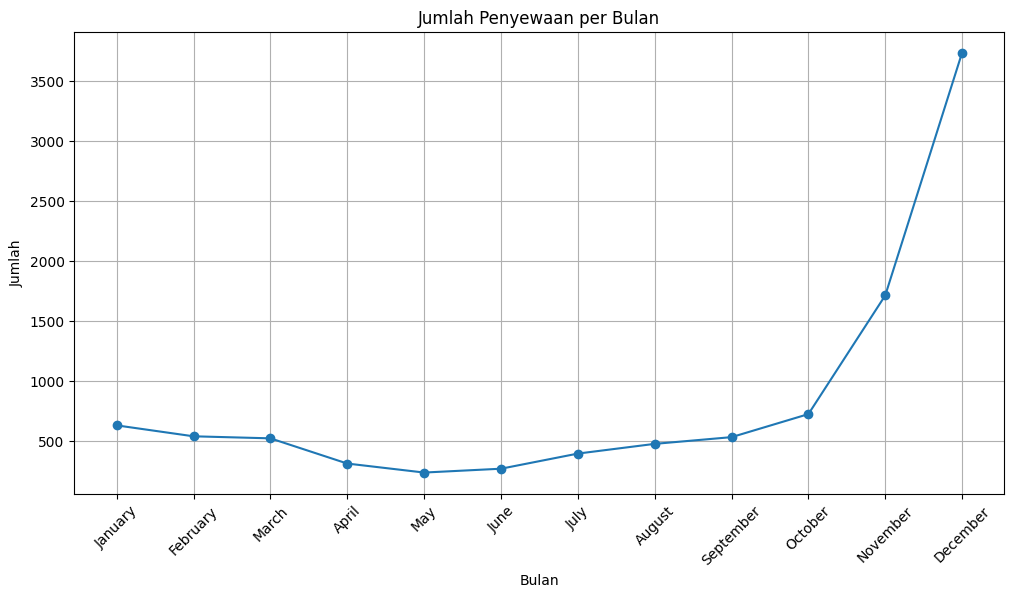

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(month.index, month['All'], marker='o', linestyle='-')
plt.title('Jumlah Penyewaan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

* Berdasarkan bulan, penyewaan tertinggi berada pada bulan Desember. Pada bulan Desember bertepatan dengan libur natal dan tahun baru yang panjang yang dimanfaatkan turis untuk berlibur ke Bangkok, Thailand
* Bangkok memiliki banyak festival dan acara menarik yang memikat para turis diantaranya New year's eve pada tanggal 31 Desember, Songkran Festival pada bulan April, Chinese new year bulan Februari, dan masih banyak lagi

* Melihat rata2 harga penyewaan berdasarkan distrik

sebelum kita melihat rata- rata harga berdasarkan distriknya, kita cek terlebih dahulu apakah terdapat pencilan pada kolom harga dengan mengambil sample 10 distrik dengan penyewaan tertinggi

boxplot diatas menunjukkan bahwa pada kolom harga terdapat outliers, maka dari itu penentuan mean atau rata-rata menjadi tidak merepresentasikan data. Selanjutnya kita menggunakan nilai tengah atau median dari kolom harga.

In [36]:
district = pd.crosstab(df['neighbourhood'], columns='number_of_reviews').sort_values(by='number_of_reviews', ascending=False).head(10).index
distrik_top10 = df[df['neighbourhood'].isin(district)]
district_stats = distrik_top10.groupby('neighbourhood')['price'].describe()
district_stats.sort_values(by='count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
neighbourhood,,,,,,,,
Vadhana,2150.0,4455.553023,33116.746405,350.0,1290.75,2000.0,3463.00,1100000.0
Khlong Toei,2096.0,4250.951813,33923.873457,332.0,1175.25,1700.0,2573.25,1000000.0
Huai Khwang,1125.0,5036.084444,51769.888603,313.0,950.00,1351.0,2200.00,1000000.0
Ratchathewi,1113.0,3201.310872,18248.167283,320.0,1200.00,1536.0,2500.00,300000.0
Bang Rak,827.0,3056.336155,10749.686959,295.0,1100.00,1850.0,3199.00,300000.0
Sathon,809.0,2338.238566,7793.697671,318.0,1000.00,1300.0,2074.00,200000.0
Phra Nakhon,619.0,1731.361874,1850.933441,280.0,597.00,1114.0,2000.00,17316.0
Phra Khanong,557.0,1483.978456,1804.033668,305.0,750.00,1000.0,1600.00,24242.0
Chatu Chak,548.0,2294.386861,8263.712686,315.0,800.00,1100.0,1780.00,122594.0


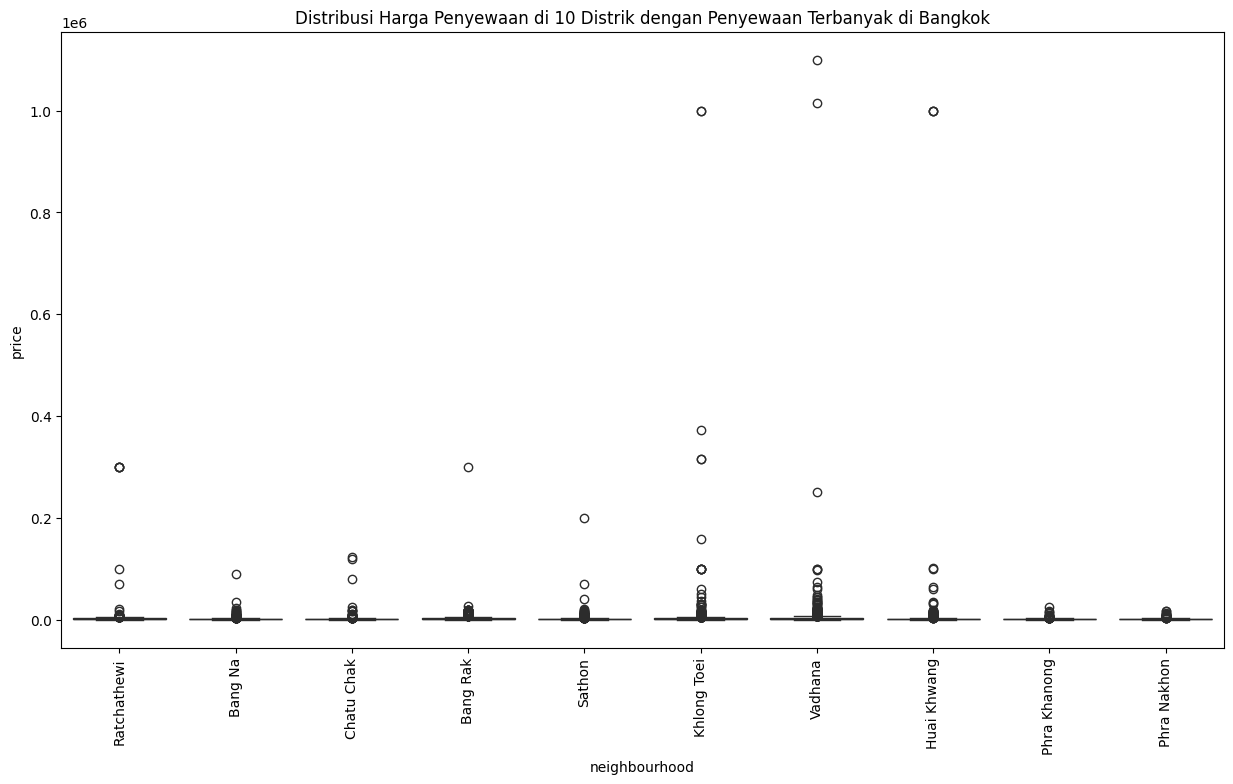

In [37]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='neighbourhood', y='price', data=distrik_top10, palette='viridis')
plt.title('Distribusi Harga Penyewaan di 10 Distrik dengan Penyewaan Terbanyak di Bangkok')
plt.xticks(rotation=90)
plt.show()


TypeError: annotate() missing 2 required positional arguments: 'text' and 'xy'

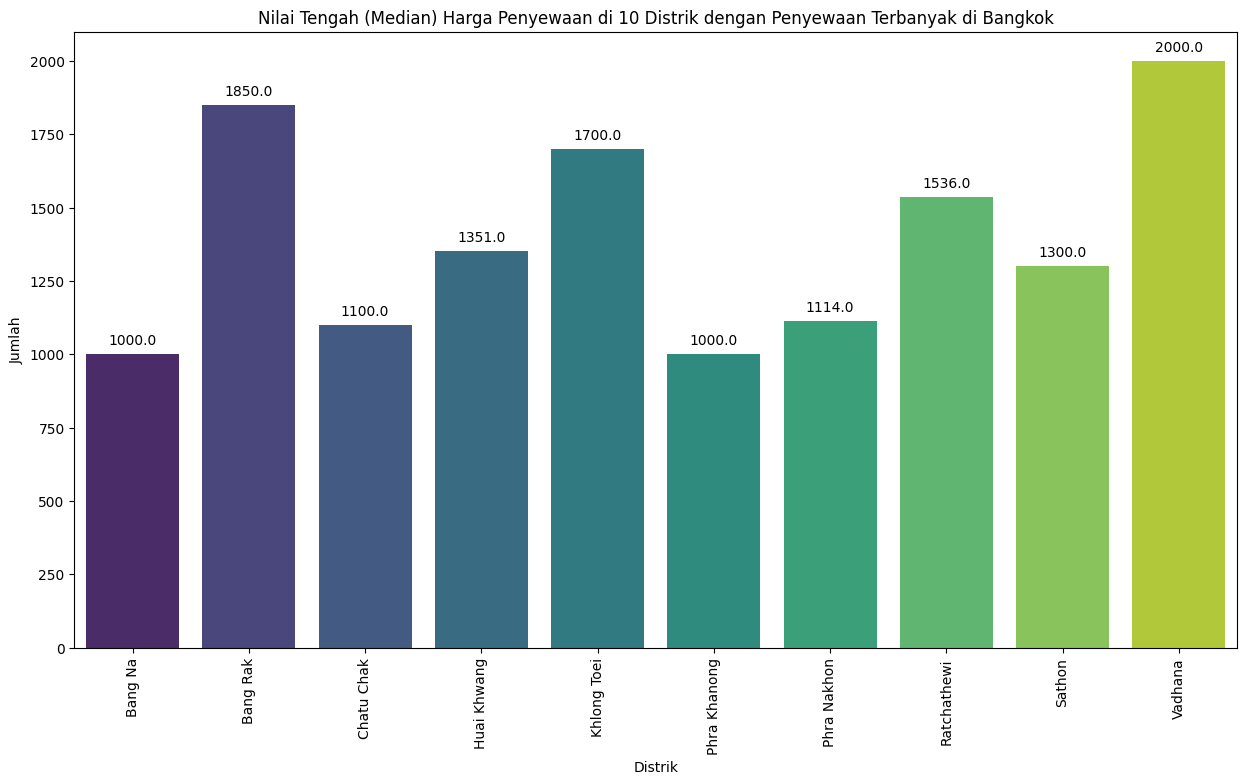

In [38]:
median_prices = distrik_top10.groupby('neighbourhood')['price'].median().reset_index()

plt.figure(figsize=(15, 8))
sns.barplot(x='neighbourhood', y='price', data=median_prices, palette='viridis')
for index, row in median_prices.iterrows():
    plt.annotate(f'{row.price}', 
                 xy=(index, row.price), 
                 xytext=(0, 5),  
                 textcoords='offset points', 
                 ha='center', va='bottom', 
                 fontsize=10, color='black')
plt.title('Nilai Tengah (Median) Harga Penyewaan di 10 Distrik dengan Penyewaan Terbanyak di Bangkok')
plt.xlabel('Distrik')
plt.ylabel('Jumlah')
plt.xticks(rotation=90)
plt.annotate()
plt.show()

Dari barplot diatas dapat dilihat bahwa nilai tengah tertinggi berada di distrik Vadhana. Selaras dengan tingginya jumlah penyewa di distrik Vadhana, nilai harga sewa di daerah tersebut juga tinggi.

Sebelumnya dapat disimpulkan bahwa tren penyewaan pada 10 tahun terakhir cenderung meningkat. Kita coba analogikan semakin lama nilai harga penyewaan seharusnya meningkat seiring waktu. Kita coba paparkan apakah nilai harga yang disewakan berkorelasi dengan tahun.

Text(0, 0.5, 'Median Harga')

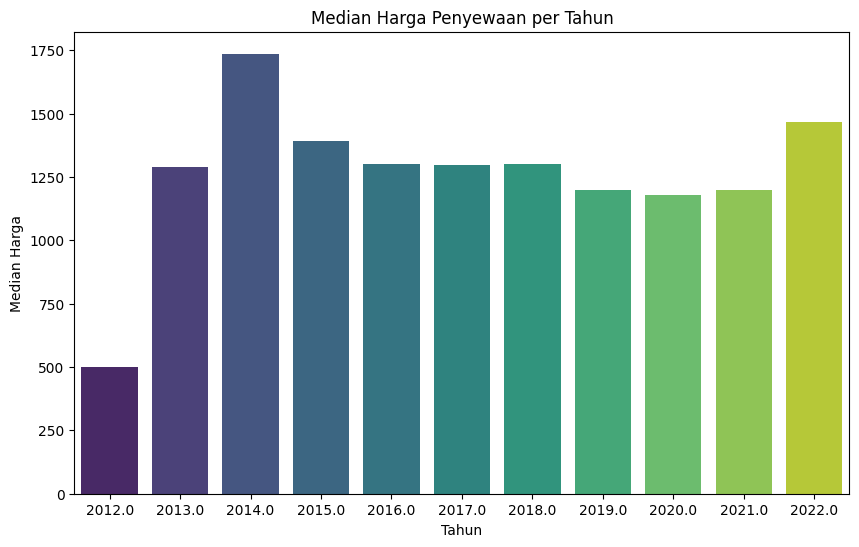

In [40]:
median_prices_year = df.groupby('year')['price'].median().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='price', data=median_prices_year, palette='viridis')
plt.title('Median Harga Penyewaan per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Median Harga')

In [52]:
# drop baris yang data tahun nya kosong
df_cleaned = df.dropna(subset=['price', 'year'])

In [53]:
spearman_corr, spearman_p_value = spearmanr(df_cleaned['price'], df_cleaned['year'])
print(f"Korelasi Spearman: {spearman_corr:.3f} (p-value: {spearman_p_value:.3f})")

Korelasi Spearman: 0.077 (p-value: 0.000)


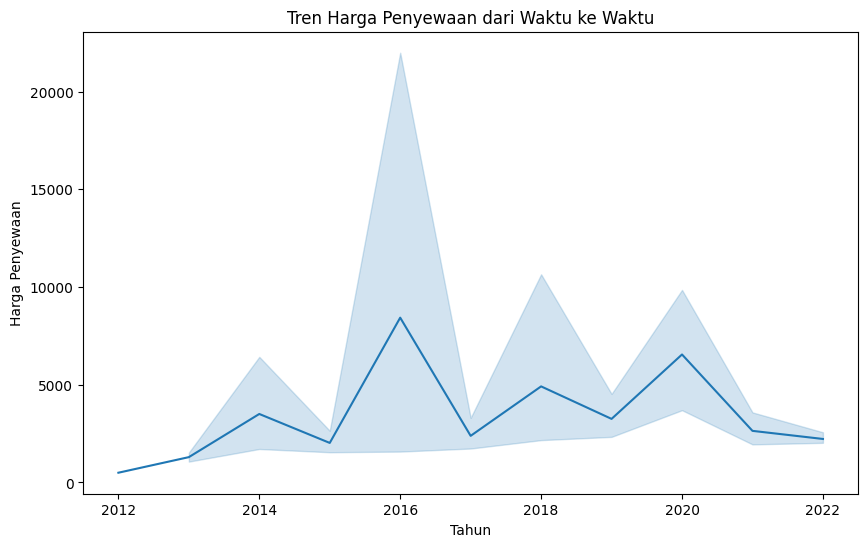

In [55]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='price', data=df)
plt.title('Tren Harga Penyewaan dari Waktu ke Waktu')
plt.xlabel('Tahun')
plt.ylabel('Harga Penyewaan')
plt.show()

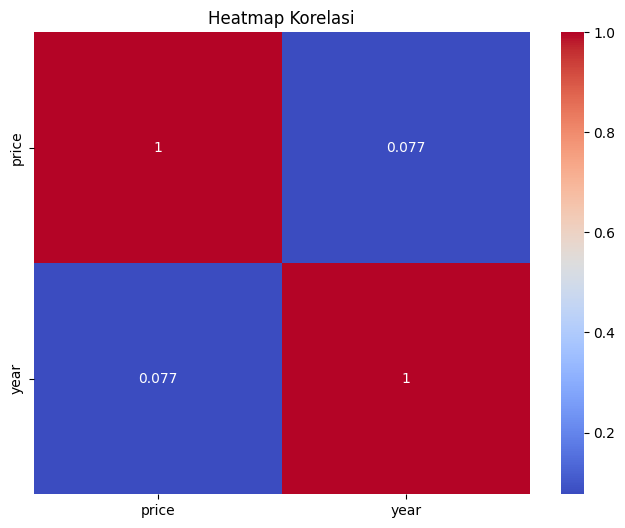

In [ ]:
corr = df[['price', 'year']].corr('spearman')
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()

Setelah dilakukan analisis stratistik dengan metode non-parametrik yaitu korelasi spearmen , terlihat hasil korelasi antara harga dan tahun menunjukkan nilai 0.077 yang dapat diartikan terdapat sedikit hubungan antara harga dengan tahun, peningkatan harga per tahun terjadi namun hubungannya sangat lemah. 

## Secara keseluruhan, dapat disimpulkan bahwa :
* Daerah yang paling tinggi jumlah penyewaannya adalah Vadhana. Hal ini menujukkan adanya permintaan yang tinggi untuk tempat penyewaan properti di daerah ini. Investor dapat mempertimbangkan untuk membuat atau memperbanyak properti yang dapat disewakan di daerah ini untuk mendapatkan potensi tinggi dalam hal penyewaan dan meningkatkan profit.
* Tipe kamar yang paling banyak diminati adalah tipe Entire home/ apartment. Hal tersebut dapat menjadi pertimbangan dalam pembuatan properti baru untuk disewakan. Kemungkinan penyewa apartment tinggi dikarenakan penyewa membutuhkan ruang yang cukup besar dan memiliki privasi untuk dirinya dan orang-orang yang ikut bersama mereka.
* Investor atau calon pengelola properti ini juga dapat mempertimbangkan bulan bulan apa saja yang memungkinkan terjadinya lonjakan penyewa. Misalnya pada akhir tahun yaitu bulan Desember. Hal yang dapat dilakukan misalnya melakukan promosi pada bulan tersebut atau penyesuaian harga dengan tingkat permintaan untuk memaksimalkan profit.
* Saran tambahan, untuk properti yang akan dibangun bisa menggunakan tema tema yang aestetik atau berbeda dari properti yang sudah ada, untuk menarik perhatian calon penyewa. Usahakan untuk memilih wilayah yang dekat dengan tujuan wisatawan, pusat perkantoran, atau yang akses dengan transportasi umum yang mudah.

Dengan menggunakan data yang diberikan ini sebagai panduan, investor dapat membuat keputusan yang lebih terinformasi dan mengarahkan strategi investasi mereka untuk memaksimalkan potensi pendapatan dan pertumbuhan dalam industri properti sewaan di Bangkok